### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# from comet_ml import Experiment
# experiment = Experiment(
#   api_key = "5bfhr7lk4OnjyeismCfnATd5j",
#   project_name = "general",
#   workspace="maryk"
# )

In [3]:
# Experiment.log_metrics()
# Experiment.log_parameters()

### Loading Dataset

In [2]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [2]:
# Opening file for reading in binary mode
#- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

train_imgs = data['x_train']
test_imgs = data['x_test']
valid_imgs = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']

In [141]:
# a = tri_X_train[7].astype(np.uint8)
# # b = np.zeros((32,32,3))
# # # for i in [0,1,2]:
# # #     b[:,:,i] = cv2.equalizeHist(a[:,:,i])
# # # blur = cv2.fastNlMeansDenoisingColored(a.astype(np.uint8), 
# # #                                        dst = None,
# # #                                        h=8,
# # #                                        hColor = 5,
# # #                                        templateWindowSize = 7 ,
# # #                                        searchWindowSize = 32)
# blur = cv2.GaussianBlur(a , (3,3),0)
# clahe = cv2.createCLAHE(clipLimit=1)
# for i in [0,1,2]:
#     b[:,:,i] = clahe.apply(a[:,:,i])
    
# Rn , Gn , Bn = cv2.split(b)
    
# R = Rn - ( Gn + Bn ) / 2;          #tuned Red
# G = Gn - ( Rn + Bn ) / 2;          #tuned Green
# B = Bn - ( Rn + Gn ) / 2;          #tuned Blue
# Y = (Rn+Gn)/2 - abs(Rn-Gn)/2 - Bn; #Tuned Yellow

# BW = R + G; # black-white opponent channel
# RG = R - G; # red-green   opponent channel
# BY = B - Y; # blue-yellow opponent channel



In [67]:
b.min()

124.53873697916667

In [ ]:
# def augment_brightness_camera_images(image):
#     image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
#     plt.imshow(image1)
#     image1 = np.array(image1, dtype = np.float64)
#     random_bright = .5+np.random.uniform()
#     image1[:,:,2] = image1[:,:,2]*random_bright
#     image1[:,:,2][image1[:,:,2]>255]  = 255
#     image1 = np.array(image1, dtype = np.uint8)
#     image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
#     return image1


#new = augment_brightness_camera_images(image)
new = preprocess_img(image)
#plt.imshow(new)
print(new.shape)
print(cycle)

In [3]:
A = np.array(np.where(train_labels >= 18))
A = np.concatenate((A ,np.where(train_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(train_labels == 11)), axis = 1)
B = np.array(np.where(train_labels > 31))
indx = np.setdiff1d(A, B)

A = np.array(np.where(test_labels >= 18)) 
A = np.concatenate((A ,np.where(test_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(test_labels == 11)), axis = 1)
B = np.array(np.where(test_labels > 31))
indx1 = np.setdiff1d(A, B)

A = np.array(np.where(valid_labels >= 18)) 
A = np.concatenate((A ,np.where(valid_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(valid_labels == 11)), axis = 1)
B = np.array(np.where(valid_labels > 31))
indx2 = np.setdiff1d(A, B)

tri_X_train = train_imgs[indx]
tri_X_test = test_imgs[indx1]
tri_X_valid = valid_imgs[indx2]
tri_train_labels = train_labels[indx]
tri_test_labels = test_labels[indx1]
tri_valid_labels = valid_labels[indx2]

In [4]:
tri_Dict = {11:0 , 13:1 , 18:2 , 19:3 , 20:4 , 21:5 , 22:6 , 23:7 , 24:8 , 25:9 , 26:10 , 27:11 , 28:12 , 29:13 , 30:14 , 31:15 }
tri_train_labels = np.vectorize(tri_Dict.get)(tri_train_labels)
tri_test_labels = np.vectorize(tri_Dict.get)(tri_test_labels)
tri_valid_labels = np.vectorize(tri_Dict.get)(tri_valid_labels)
tri_num_class = 16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


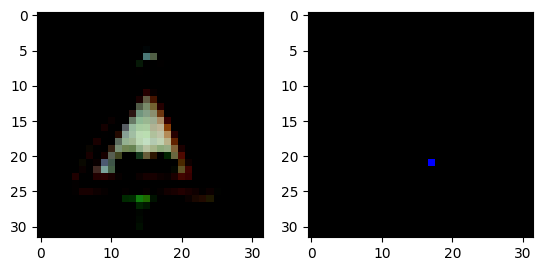

In [58]:
# i = 1054
# a = tri_X_train[i]
# plt.subplot(1,2,1)
# plt.imshow(a)

# img[:,:,0] = cv2.equalizeHist(a[:,:,0].astype(np.uint8))
# img[:,:,1] = cv2.equalizeHist(a[:,:,1].astype(np.uint8))
# img[:,:,2] = cv2.equalizeHist(a[:,:,2].astype(np.uint8))
# plt.subplot(1,2,2)

# plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


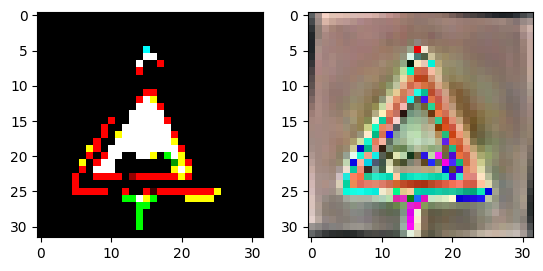

In [53]:

# img1 = img
# a = cv2.fastNlMeansDenoisingColored(img1.astype(np.uint8), 
#                                        dst = None,
#                                        h=4,
#                                        hColor = 1,
#                                        templateWindowSize = 7 ,
#                                        searchWindowSize = 4  )
# plt.subplot(1,2,1)
# plt.imshow(img1)
# plt.subplot(1,2,2)
# plt.imshow(a)


In [5]:
def preprocessing(a):
    a = (a * 255).astype(np.uint8)
    b = np.zeros((32,32,3))

    blur = cv2.GaussianBlur(a , (3,3),0)
    clahe = cv2.createCLAHE(clipLimit=1)
    for i in [0,1,2]:
        b[:,:,i] = clahe.apply(a[:,:,i])
    return b / 255
    

In [ ]:
# from skimage import color, exposure, transform

# NUM_CLASSES = 43
# IMG_SIZE = 48

# def preprocess_img(img):
#     # Histogram normalization in v channel
#     hsv = color.rgb2hsv(img)
#     hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
#     img = color.hsv2rgb(hsv)

#     # central square crop
#     min_side = min(img.shape[:-1])
#     centre = img.shape[0]//2, img.shape[1]//2
#     img = img[centre[0]-min_side//2:centre[0]+min_side//2,
#     centre[1]-min_side//2:centre[1]+min_side//2, :]

#     # rescale to standard size
#     img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

#     # roll color axis to axis 0
#     img = np.rollaxis(img,-1)

#     return img

### Image Data Preprocessing

In [9]:
tri_X_train.shape

(32368, 32, 32, 3)

In [7]:
# x_train = []
# for i in range(0 , tri_X_train.shape[0]):
#     x_train.append(preprocessing(tri_X_train[i]))

# x_test = []
# for i in range(0 , tri_X_test.shape[0]):
#     x_test.append(preprocessing(tri_X_test[i]))

# x_valid = []
# for i in range(0 , tri_X_valid.shape[0]):
#     x_valid.append(preprocessing(tri_X_valid[i]))
    
    
# x_train = np.array(x_train)
# x_test =  np.array(x_test)
# x_valid =  np.array(x_valid)


In [5]:
# # Peforming reshaping operation
# # x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# # x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = tri_X_train
x_test = tri_X_test
x_valid = tri_X_valid

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 16

# One Hot Encoding
y_train = keras.utils.to_categorical(tri_train_labels, 16)
y_test = keras.utils.to_categorical(tri_test_labels, 16)
y_valid = keras.utils.to_categorical(tri_valid_labels, 16)
# a, x_train, b, y_train = train_test_split(x_train, y_train, test_size=0.36, random_state=42)

In [6]:
keras.backend.clear_session()

### LeNet Model Architecture

In [7]:
# Building the Model Architecture
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))#************
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(16, activation='softmax'))#********************
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense


# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(16, activation='softmax'))
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(16, activation='softmax'))

# model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=x_train.shape[1:]))
# model.add(layers.MaxPool2D(strides=2))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.3))

# #ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
# model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
# model.add(layers.MaxPool2D(strides=2))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.3))

# #ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
# model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
# model.add(layers.MaxPool2D(strides=2))
# model.add(layers.BatchNormalization())

# #Flatten
# model.add(layers.Flatten())

# #2 Dense layers with 4000 hidden units
# model.add(layers.Dense(4000,activation='relu'))
# model.add(layers.Dense(4000,activation='relu'))

# #Dense layer with 1000 hidden units
# model.add(layers.Dense(1000,activation='relu'))

# #Softmax layer for output
# model.add(layers.Dense(16,activation='softmax'))

# model = Sequential()
# # Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# # That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# # Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
# # The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# # The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# # The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# # The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# # So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# # The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# # The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
# model.add(Dense(84, activation='relu'))
# # The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
# model.add(Dense(16, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [28]:
# hyper_params = {
#   "learning_rate": 0.001,
#   "epoch": 50,
#   "batch_size": 128,
#     "beta_1" : 0.9,
#     "beta_2" : 0.999
# }
# experiment.log_parameters(hyper_params)
    
# # Or report single hyperparameters:
# hidden_layer_size = 50
# experiment.log_parameter("hidden_layer_size", hidden_layer_size)
    
# # Long any time-series metrics:
# train_accuracy =3.14
# experiment.log_metric("accuracy", train_accuracy, step=0)

In [8]:
opt = keras.optimizers.Adam()
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [9]:
h = model.fit(x_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/70
253/253 [==============================] - 16s 29ms/step - loss: 1.2250 - accuracy: 0.6466 - val_loss: 0.4633 - val_accuracy: 0.8682
Epoch 2/70
253/253 [==============================] - 7s 26ms/step - loss: 0.2609 - accuracy: 0.9291 - val_loss: 0.3169 - val_accuracy: 0.9302
Epoch 3/70
253/253 [==============================] - 7s 28ms/step - loss: 0.1351 - accuracy: 0.9637 - val_loss: 0.2375 - val_accuracy: 0.9512
Epoch 4/70
253/253 [==============================] - 7s 29ms/step - loss: 0.0903 - accuracy: 0.9745 - val_loss: 0.2356 - val_accuracy: 0.9550
Epoch 5/70
253/253 [==============================] - 7s 27ms/step - loss: 0.0702 - accuracy: 0.9791 - val_loss: 0.2357 - val_accuracy: 0.9566
Epoch 6/70
253/253 [==============================] - 7s 28ms/step - loss: 0.0534 - accuracy: 0.9842 - val_loss: 0.3326 - val_accuracy: 0.9403
Epoch 7/70
253/253 [==============================] - 7s 26ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.3488 - val_accuracy: 0.931

In [10]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 2s 12ms/step - loss: 1.2781 - accuracy: 0.9140
Test Loss: 1.278111457824707
Test accuracy: 0.9139600992202759


In [16]:
# experiment.end()

In [32]:
model.count_params()

122960

In [11]:
pred = model.predict(x_test)
cr = classification_report(pred.argmax(axis = 1) , y_test.argmax(axis = 1))
print(cr)

110/110 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       429
           1       0.99      1.00      1.00       717
           2       0.90      0.99      0.94       355
           3       0.95      0.93      0.94        61
           4       0.88      0.70      0.78       113
           5       0.67      0.72      0.69        83
           6       0.95      0.97      0.96       118
           7       0.98      0.72      0.83       205
           8       0.91      0.95      0.93        86
           9       0.90      0.97      0.93       444
          10       0.88      0.91      0.90       174
          11       0.52      0.57      0.54        54
          12       0.91      0.84      0.87       161
          13       0.98      0.83      0.90       106
          14       0.65      0.77      0.70       126
          15       0.95      0.92      0.93       278

    accuracy            

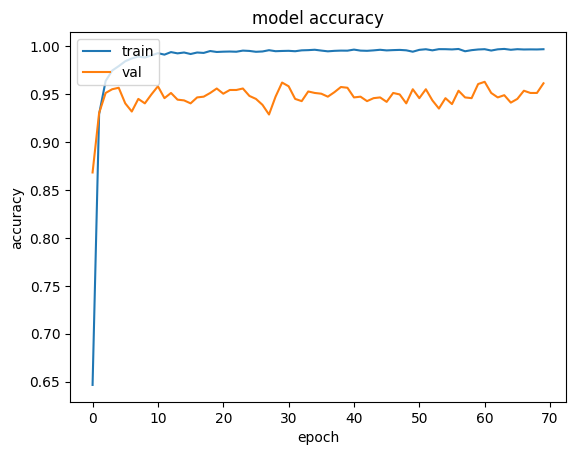

In [12]:
history = h
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

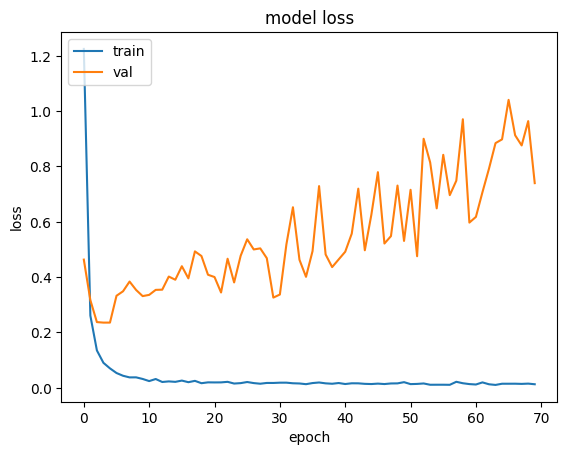

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_36per_train_data96.h5"  

model.save(model_save_dir)


In [31]:
from keras.models import load_model

model = load_model("D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_acc96.h5")

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 1s 9ms/step - loss: 320.6290 - accuracy: 0.1197
Test Loss: 320.62896728515625
Test accuracy: 0.11965811997652054


## Hope you like it!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


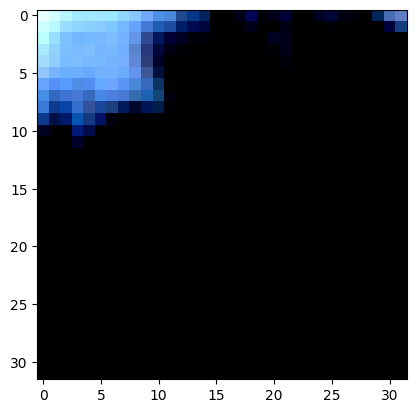

1/1 [==============================] - 1s 955ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
from matplotlib import pyplot as plt
image = x_train[65:66,:,:]#.transpose(2 , 0 ,1)
plt.imshow(image[0].reshape((32,32,3)))
plt.show()
#y = model.predict_classes(image)
y = (model.predict(image) > 0.5).astype("int32")
print(y[0])
print(y_train[65:66])

ValueError: cannot reshape array of size 3072 into shape (32,32)

In [ ]:
import numpy
x = numpy.where(gray_train_labels == 2)

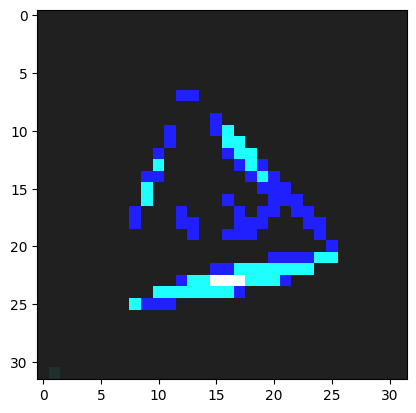

In [167]:
a = x_train[7]
plt.imshow(a)